# Clustering

#####  All algorithms were designed by Hyungjoo Kim and Dataset was provided at UCL

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import inv

In [2]:
# Class
# Iris Setosa for label 0, Iris Versicolour label 1, Iris Virginica for label 2
train_label = np.load('./IRIS/iris_train_labels.npy') # [2 1 1 0 2 2 2 0 1...] (96,)
train_samp = np.load('./IRIS/iris_train_samples.npy') # (96,4) sepal length, sepal width, petal length, petal width
val_label = np.load('./IRIS/iris_val_labels.npy')
val_samp = np.load('./IRIS/iris_val_samples.npy')

MNIST_train_label = np.load('./MNIST/mnist_train_labels.npy')
MNIST_train_samp = np.load('./MNIST/mnist_train_samples.npy')  # (44800, 28*28)
MNIST_val_label = np.load('./MNIST/mnist_val_labels.npy')
MNIST_val_samp = np.load('./MNIST/mnist_val_samples.npy')

**Task 1: Implement a function pca(X, ndims) that performs PCA over the input data X and returns both the
mean vector $\bar X$ and the ndims top components. The top components are the eigen vectors linked to
the top eigen values computed from the covariance matrix. Try your function on the MNIST dataset,
which is composed of 10 digit classes. Display the top 10 components fitted on the train dataset as
images and check that you can reconstruct perfectly an input digit from the validation set using all
components.**

In [3]:
def PCA(X, ndims):
    X_mean = np.mean(X, axis = 0)
    covariance_matrix = np.matmul((X - X_mean).T, (X - X_mean)) / (X.shape[0] - 1)
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
    eigen_vectors = eigen_vectors.T
    
    top_10_components = eigen_vectors[:ndims]
    return X_mean, eigen_vectors, top_10_components

(44800, 784)


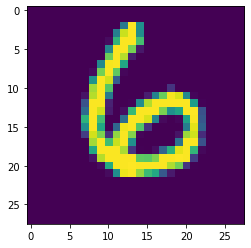

In [48]:
print(MNIST_train_samp.shape)
train1 = MNIST_train_samp[8, :].reshape(28, 28)
plt.imshow(train1)
plt.show()

(10, 784)


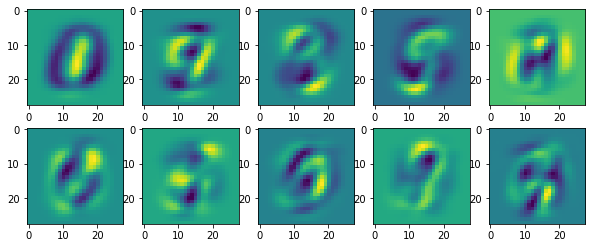

In [49]:
# Perform PCA
mean_value, all_basis, top_10_components = PCA(MNIST_train_samp, 10)
print(top_10_components.shape)

# Display the top 10 components fitted on the train dataset
fig = plt.figure(figsize = (10, 4))
columns = 5
rows = 2
for i in range(1, columns * rows + 1):   # 1 .... 11
    image = np.real(top_10_components[i - 1])  # eigenvectors correspond to the biggest 10 number of eigenvalues
    fig.add_subplot(rows, columns, i)
    plt.imshow(image.reshape(28, 28))
plt.show()

In [50]:
# Check that you can reconstruct perfectly an input digit from the validation set using all components.
print(np.linalg.inv(all_basis.T))

[[-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]]


**Answer:** *Yes, it can perfectly reconstruct an input digit if all components are used to the validation set because the vectors are orthogonal. It means that it is a linear independent and can be invertible as shown the above matrix (all_basis.T)*

**Task 2: Perform independent research on the clustering algorithm k-means. Implement a function kmeans performing k-means on input data X. Propose the interface to that function (i.e., what is its input and output?) and write in three sentences why this is. Apply you Kmeans implementation on the MNIST training set with k = 10 clusters and display the centroids as images.**

In [4]:
def K_means(X, k, iter):
    mu_array = []  # randomly initialise mu_array and record it in the list
    for i in range(k):
        mu_array.append(np.random.rand(784, ) * 255.0)
    
    mu_array = np.array(mu_array)  # (10, 784)
    gamma_array = np.zeros(len(X))  # (44800, ) 0-9
    for i in range(iter):  # E_step (update gamma_array)
        for point_idx, point in enumerate(X):
            closest_distance = 255**2
            for mu_idx in range(len(mu_array)):
                distance = np.mean((mu_array[mu_idx] - point)**2)
                if distance < closest_distance:
                    closest_distance = distance
                    gamma_array[point_idx] = mu_idx
        print(f"E_step finished {i + 1} / {iter}")
        
        for mu_idx in range(len(mu_array)):  # M_step (update mu_array)
            point_idx_for_mu = []  # record in the list
            for point_idx, gamma in enumerate(gamma_array):
                if gamma == mu_idx:
                    point_idx_for_mu.append(point_idx)           
            new_mu = 0
            for point_idx in point_idx_for_mu:
                new_mu += X[point_idx]
            try:
                new_mu /= float(len(point_idx_for_mu))
            except:
                new_mu = 0
            mu_array[mu_idx] = new_mu
        print(f"M_step finished {i + 1} / {iter}")
    return mu_array, gamma_array

E_step finished 1 / 10
M_step finished 1 / 10
E_step finished 2 / 10
M_step finished 2 / 10
E_step finished 3 / 10
M_step finished 3 / 10
E_step finished 4 / 10
M_step finished 4 / 10
E_step finished 5 / 10
M_step finished 5 / 10
E_step finished 6 / 10
M_step finished 6 / 10
E_step finished 7 / 10
M_step finished 7 / 10
E_step finished 8 / 10
M_step finished 8 / 10
E_step finished 9 / 10
M_step finished 9 / 10
E_step finished 10 / 10
M_step finished 10 / 10


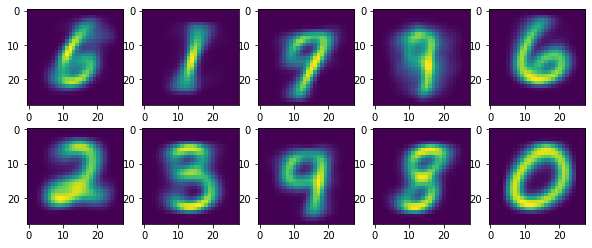

In [52]:
# Display centroids
centroids, gamma = K_means(MNIST_train_samp, 10, 10)
fig = plt.figure(figsize = (10, 4))
columns = 5
rows = 2
for i in range(1, columns * rows + 1):
    image = centroids[i - 1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(image.reshape(28, 28))
plt.show()

**Answer:** *In the kmeans algorithm, it has several inputs and outputs in the function.

*Input: **Data (X)**, **k (the number of cluster)** and **iteration**, which needs to decrease the value of loss function.*

*Output: **Centroid** and **gamma**. In order to figure out which each data allocates to the centroid, and boundary line between mu1 and mu2 in E_step figure.*

**Task 3: Describe the k-means algorithm, highlighting similarities and differences from KNN. Compare the reconstruction loss on the validation set for both k-means and PCA. Write no more than ten sentences.**

**Answer:** *KNN is a type of supervised learning algorithm for using a cluster and k-means is a type of unsupervised learning algorithm for using a classification and regression. They represent the same 'k', but it means different that 'k' of knn means the k number of points of new data and 'k' of k-means means the number of cluster to get the data. Furthermore, KNN algorithm select the nearest and closest neighbours if a val_samp is given. Otherwise, k-means algorithm find the centroid point of the cluster during each iteration and the cluster moves slightly to the function to minimise. 
However, KNN and k-means algorithm have a common method, which uses for getting distance algorithm and based on metric.*

E_step finished 1 / 10
M_step finished 1 / 10
E_step finished 2 / 10
M_step finished 2 / 10
E_step finished 3 / 10
M_step finished 3 / 10
E_step finished 4 / 10
M_step finished 4 / 10
E_step finished 5 / 10
M_step finished 5 / 10
E_step finished 6 / 10
M_step finished 6 / 10
E_step finished 7 / 10
M_step finished 7 / 10
E_step finished 8 / 10
M_step finished 8 / 10
E_step finished 9 / 10
M_step finished 9 / 10
E_step finished 10 / 10
M_step finished 10 / 10
Error of PCA is 1.4208195510755752e-14
Error of Kmeans is 0.054106738380059846


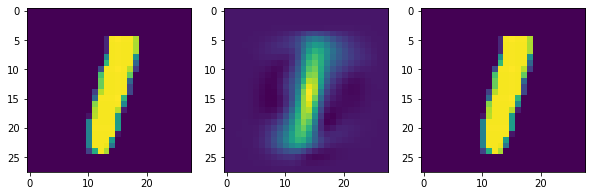

In [7]:
# Bring the PCA and k-means, top_component and centroid, respectively
_, top_10_components, _ = PCA(MNIST_train_samp, 10)
centroids, _ = K_means(MNIST_train_samp, 10, 10)

num_samp = len(MNIST_val_samp)
pca = top_10_components.T
kmeans = centroids.T
validation_set = MNIST_val_samp.T

sum_pca = 0
sum_kmeans = 0
for i in range(num_samp):
    # w = ((x.T)x)^-1*x*y
    w_pca = np.matmul(inv(np.matmul(pca.T, pca)), pca.T).dot(validation_set[:, i])
    w_kmeans = np.matmul(inv(np.matmul(kmeans.T, kmeans)), kmeans.T).dot(validation_set[:, i])
    
    error_pca = np.mean(validation_set[:, i] - np.matmul(pca, w_pca))
    error_kmeans = np.mean(validation_set[:, i] - np.matmul(kmeans, w_kmeans))
    
    sum_pca += error_pca
    sum_kmeans += error_kmeans

print("Error of PCA is", sum_pca / num_samp)
print("Error of Kmeans is", sum_kmeans / num_samp)

# Visualisation for the last image
fig = plt.figure(figsize = (10, 4))
image_1 = np.real(np.matmul(pca, w_pca))
fig.add_subplot(1, 3, 1)
plt.imshow(image_1.reshape(28, 28))

image_2 = np.real(np.matmul(kmeans, w_kmeans))
fig.add_subplot(1, 3, 2)
plt.imshow(image_2.reshape(28, 28))

image_3 = np.real(validation_set[:, -1])
fig.add_subplot(1, 3, 3)
plt.imshow(image_3.reshape(28, 28))
plt.show()

**Answer:** *In order to compare which algorithm better distinguish the images between PCA and k-means, all val_samp are used and calculates the error of each pixel in each algorithm. The error of PCA is 3.3 and it means that difference of each pixel between train sample and test sample is about **3.3** (grade of each pixel in a test sample is 50 and grade of each pixel in a train sample is about 46 or 47). In addition, the error of k-means is **0.019** and it means that difference of each pixel between train sample and test sample is about 0.019 (grade of each pixel in a test sample is 50 and grade of each pixel in a train sample is about 49.981).* **Thus, k-means algorithm can distinguish better than PCA algorithm as shown the above figures.**